# **Maestría en Inteligencia Artificial Aplicada**

## Curso: **Procesamiento de Lenguaje Natural**

### Tecnológico de Monterrey

### Prof Luis Eduardo Falcón Morales

## Adtividad Semana 6 y 7

### **Topic modeling**

#### **Nombres y matrículas de los integrantes del equipo:**



*   Elemento de lista
*   Elemento de lista



### En la actividad de esta semana trabajarás en equipos en el tema de modelado de temas (topic modeling).

In [63]:
import json
import pandas as pd 
import seaborn as sns
import nltk
import re

from nltk.stem import WordNetLemmatizer
from nltk.stem import RegexpStemmer
from nltk.corpus import stopwords
from nltk.corpus import swadesh
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import gensim
import gensim.corpora as corpora
from gensim.models import LsiModel
from gensim.models.coherencemodel import CoherenceModel
import warnings

import matplotlib.pyplot as plt

##**Pregunta - 1:**



Descarga el archivo noticiasTopicModeling.txt que se encuentra en Canvas. Este archivo consiste en 5658 noticias de varios periódicos de España. El archivo de texto es una lista en el siguiente formato:

[{“titular”:”Encabezado“, “texto”:”Cuerpo”}, … , {“titular”:”Encabezado”,”texto”:”Cuerpo”}]

Donde “*titular*” es el encabezado de la noticia y “texto” es el cuerpo del texto de dicha noticia. En
particular en esta actividad trabajarás solamente con los cuerpos de las noticias, sin incluir los
encabezados. Carga dicho archivo y genera un DataFrame de Pandas llamado “df” y que contiene
una única columna llamada “noticia” con 5658 renglones formados por los cuerpos de las noticias.

In [22]:
# Lectura de acrchivo noticiasTopicModeling

with open('noticiasTopicModeling.txt') as f:
    json_data = json.load(f)

df = pd.json_normalize(json_data)
df = df['texto'].to_frame()
df.columns = [col.replace('texto', 'noticia').title() for col in df.columns]

In [23]:
df.shape

(5658, 1)

In [24]:
# Verifiquemos la información del DataFrame:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5658 entries, 0 to 5657
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Noticia  5658 non-null   object
dtypes: object(1)
memory usage: 44.3+ KB


In [25]:
df.head()

,Noticia
0,"""España ha dejado de ser católica"", decía Manu..."
1,El clima de crispación social en Ceuta ha lleg...
2,El Gobierno ha alegado la suspensión de plazos...
3,"Puedes mandar tu pregunta, sugerencia o queja ..."
4,Panamá debe entregar esta semana a la Corte In...


##**Pregunta - 2:**

Realiza un proceso de limpieza. Aplica el preprocesamiento que consideres adecuado para texto en español. Recuerda que el objetivo es identificar los tokens (palabras) que describan mejor la distribución de cada tema.

#### NOTA: Recuerda que esta es una técnica no supervisada, por lo que no requerimos hacer una partición de los datos.










In [65]:
nltk.download('punkt') 
nltk.download('stopwords')
wnl = WordNetLemmatizer()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ingsa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ingsa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
mystopwords = stopwords.words('spanish') # Generamos el arreglo para las stop words

print("Número de stopwords: ",len(mystopwords))
print(mystopwords)

Número de stopwords:  313
['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estam

In [28]:
# Palabras incorrectas detectadas
wrong_words = ['aaa', 'aahjko', 'aaim', 'aalla', 'aaiún', 'aamir', 'aamma', 'aaon', 'aapp']

In [30]:
def clean_tok(doc):
    Xwords = re.sub(r'[^a-zA-ZáéíóúüñÁÉÍÓÚÜÑ]', ' ', doc)
    Xtoks = [Xwords.lower().split()]
    XcleanTok = [[t for t in x if t not in mystopwords 
                                  and t not in wrong_words 
                                  and len(t) > 3 
                                  and len(t) < 20] 
                     for x in Xtoks]
    token = [t for x in XcleanTok for t in x]
    token_final = [wnl.lemmatize(w) for w in token]
    return token_final

In [31]:
# Aplicamos el proceso de limpieza y tokenización:

Xclean = [clean_tok(x) for x in df.Noticia] 

In [39]:
# Despleguemos los primeros comentarios después de tu proceso de limpieza:

for x in Xclean[0:10]: 
  print(x)

['españa', 'dejado', 'católica', 'decía', 'manuel', 'azaña', 'comienzo', 'segunda', 'república', 'aquel', 'congreso', 'diputados', 'aprobó', 'leyes', 'laicistas', 'metáfora', 'dejó', 'católica', 'papel', 'creencias', 'buena', 'parte', 'pueblo', 'migración', 'integración', 'europea', 'programa', 'europa', 'saber', 'españa', 'domingo', 'noviembre', 'dejado', 'excepción', 'europa', 'potencia', 'extremum', 'derecha', 'parlamento', 'metáfora', 'pues', 'precisamente', 'excepcional', 'tener', 'dictadura', 'mediados', 'setenta', 'dictador', 'mausoleo', 'después', 'años', 'muerto', 'existía', 'cosa', 'portugal', 'grecia', 'italia', 'alemania', 'países', 'dictaduras', 'fascista', 'españa', 'pasó', 'portugal', 'italia', 'alemania', 'derrotó', 'fascismo', 'franquismo', 'murió', 'cama', 'harakiri', 'cortes', 'franquistas', 'ruptura', 'régimen', 'sino', 'reforma', 'nació', 'nuevo', 'país', 'sino', 'país', 'mutó', 'españa', 'parecía', 'vacunada', 'años', 'franquismo', 'sido', 'bastantes', 'llegado', 

In [40]:
ws_tok=[]  # inicializamos listas de los tokens

for x in Xclean:   
    ws_tok.extend(x)   # tokens usados en comentarios positivos

wc = ' '.join(ws_tok)   # requerimos un solo string por cada clase para la nube de palabras.

print('String de los comentarios/tokens:\n', wc[0:100])

String de los comentarios/tokens:
 españa dejado católica decía manuel azaña comienzo segunda república aquel congreso diputados aprobó


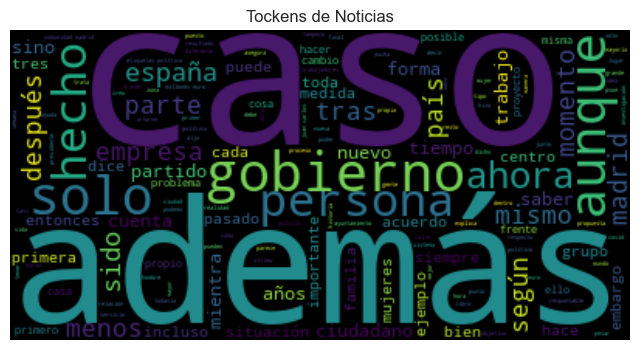

In [232]:
fig, (ax1) = plt.subplots(1, figsize=(8,8))

# Nube de palabras:
wordcloudnn = WordCloud().generate(wc)
ax1.imshow(wordcloudnn, interpolation='bilinear')
ax1.axis("off")
ax1.set_title('Tockens de Noticias')

plt.show()

## Parte 1: Indexación semántica latente (LSI)

#**Pregunta - 3:**


Encontrar la matriz Tf-idf de la columna de noticias. Despliega los primeros 5 renglones con algunas de sus columnas con sus nombres, donde las columnas son los tokens.

In [25]:
# Conjuntamos los documentos de nuevo en una lista de strings,
# que viene a ser nuestra document-term-matrix, DTM:

ddf = []

for doc in Xclean:
    tmp = ' '.join(doc)
    ddf.append(tmp)
    
ddf[0]

'españa dejado católica decía manuel azaña comienzo segunda república aquel congreso diputados aprobó leyes laicistas metáfora dejó católica papel creencias buena parte pueblo migración integración europea programa europa saber españa domingo noviembre dejado excepción europa potencia extremum derecha parlamento metáfora pues precisamente excepcional tener dictadura mediados setenta dictador mausoleo después años muerto existía cosa portugal grecia italia alemania países dictaduras fascista españa pasó portugal italia alemania derrotó fascismo franquismo murió cama harakiri cortes franquistas ruptura régimen sino reforma nació nuevo país sino país mutó españa parecía vacunada años franquismo sido bastantes llegado irrupción posfranquismo tras actores fundamentales gobiernos autonómicos locale ciudadanos españa dejado excepción aunque alianza popular manuel fraga bebiera franquismo sociológico fuerza nueva blas piñar búnker franquista aunque franquismo sociológico mantuviera largo tiemp

### Matriz Tf-idf

In [26]:
tfidf = TfidfVectorizer(max_df=1.0,  # (float o int) ignora las palabras con frecuencia mayor a max_df
                        min_df=1     # ignora las palabras con frecuencia menor a min_df
                       )

tfidf_sparse = tfidf.fit_transform(ddf)     # csr_matrix de la DTM

In [27]:
tfidf_dense = pd.DataFrame(tfidf_sparse.toarray(), columns=tfidf.get_feature_names_out()) 
tfidf_dense.head(5)

,aaa,aardman,aaron,aarron,aarts,aarón,abad,abades,abadeses,abadi,...,únicas,único,únicos,úriz,úrsula,útero,útil,útiles,útlimo,ünsal
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### ¿Cuál es el significado de cada renglón?

Una Matriz Tf.idf es una representación numérica de textos, donde cada una de las filas (renglón) representa un documento dentro de nuestro corpus.

#### ¿Y el significado de cada columna?

Para el caso de las columnas dentro de la matriz, representa un término (palabra) dentro de nuestro corpus.

In [28]:
del tfidf_dense

#**Pregunta - 4:**

Aplica el método de descomposición de valores singulares truncado a la matriz Tf-idf anterior con 10 componentes y obtener el gráfico de la importancia relativa de estas.

### Factorización SVD

In [29]:
# Se define el objeto que aplicará SVD truncada con r valores singulares:

r = 10    # Máxima cantidad de valores singulares a considerar --> tópicos a generar:

lsi_obj = TruncatedSVD(n_components = r, 
                       n_iter=100,  # número de iteraciones ... recordemos que es un método iterativo.
                       random_state=42) 

tfidf_lsi = lsi_obj.fit_transform(tfidf_sparse)    # ndarray: se ajusta y aplica la SVD truncada.

Sigma = lsi_obj.singular_values_    # ndarray_(r,)

V_T = lsi_obj.components_.T         # ndarray_(n_terms X r)  
                                    # Las r columnas son los r temas/topics generados
                                    # Se ordenan los n_terms/words de mayor a menor para 
                                    # obtener las keywords principales de cada tópico.

In [30]:
sigmas = lsi_obj.singular_values_

sigmas

array([13.23076477,  7.38030195,  5.76446097,  5.74907532,  5.57455032,
        5.39864035,  4.96923859,  4.81942578,  4.70738665,  4.56551133])

C:\Users\ingsa\anaconda3\lib\site-packages\seaborn\_core.py:1485: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


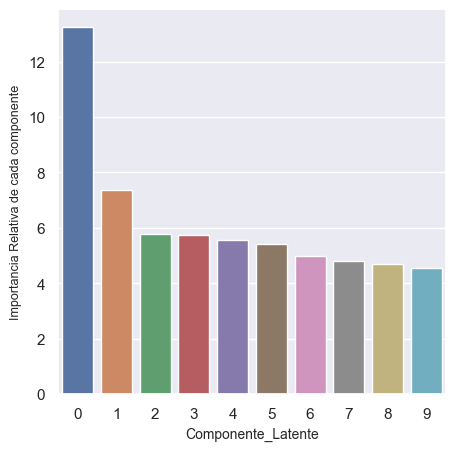

In [31]:
sns.set(rc={'figure.figsize':(5,5)}) 
chart = sns.barplot(x=list(range(len(Sigma))), y = Sigma )
chart.set_xlabel('Componente_Latente', fontdict={'size': 10})
chart.set_ylabel('Importancia Relativa de cada componente', fontdict={'size': 9})
plt.show()

#**Pregunta - 5:**

Obtener la matriz tokens-temas (term-topic) a partir de la matriz 𝑉􀯍 de la descomposición SVD. Despliega sus primeros 5 renglones donde se incluya el nombre de las columnas.

In [32]:
# La matriz V-transpuesta es la que genera la relación Terms(word)-Topics,
# los renglones son los términos/words y las columnas los tópicos/temas:

lsi_term_topic = V_T 

print(lsi_term_topic.shape)

(96792, 10)


In [33]:
# rescatemos los nombres de los términos/tokens:

term_names = list(tfidf.get_feature_names_out())

print(term_names)

['aaa', 'aardman', 'aaron', 'aarron', 'aarts', 'aarón', 'abad', 'abades', 'abadeses', 'abadi', 'abadiño', 'abadía', 'abaitua', 'abajo', 'abal', 'abalanza', 'abalanzamos', 'abalanzaron', 'abalanzándose', 'abalanzó', 'abalos', 'abalosmeco', 'abanca', 'abandera', 'abanderaban', 'abanderada', 'abanderadas', 'abanderado', 'abanderados', 'abanderando', 'abanderar', 'abandere', 'abanderen', 'abanderándose', 'abanderó', 'abandoibarra', 'abandona', 'abandonaba', 'abandonaban', 'abandonada', 'abandonadas', 'abandonado', 'abandonados', 'abandonament', 'abandonamos', 'abandonan', 'abandonando', 'abandonar', 'abandonara', 'abandonaran', 'abandonaremos', 'abandonarla', 'abandonarle', 'abandonarlo', 'abandonarlos', 'abandonaron', 'abandonarse', 'abandonará', 'abandonarán', 'abandonaría', 'abandonaríamos', 'abandonase', 'abandonasen', 'abandonats', 'abandone', 'abandonei', 'abandonemos', 'abandonen', 'abandones', 'abandono', 'abandonos', 'abandonándolo', 'abandonándose', 'abandoné', 'abandonéis', 'aba

In [34]:
# Y generamos un DataFrame con la matriz term-topic:

term_topic_matrix = pd.DataFrame(data=lsi_term_topic, 
                                 index = term_names,   
                                 columns = [f'Concepto_Latente_{r}' for r in range(0,V_T.shape[1])]
                                )

print(term_topic_matrix.shape)   #  words X topics

(96792, 10)


In [35]:
term_topic_matrix.head(5)

,Concepto_Latente_0,Concepto_Latente_1,Concepto_Latente_2,Concepto_Latente_3,Concepto_Latente_4,Concepto_Latente_5,Concepto_Latente_6,Concepto_Latente_7,Concepto_Latente_8,Concepto_Latente_9
aaa,0.000029,0.000008,-0.000003,-0.000065,0.000050,0.000011,-0.000097,6.346538e-07,0.000028,-0.000029
aardman,0.000236,-0.000193,-0.000225,-0.000522,0.000542,0.000653,-0.000353,-1.668936e-05,0.000596,-0.000220
aaron,0.000111,-0.000173,-0.000074,-0.000141,0.000224,0.000406,-0.000435,-1.514414e-04,0.000134,-0.000112
aarron,0.000015,-0.000020,-0.000020,-0.000048,0.000061,0.000079,-0.000077,-1.618414e-06,0.000044,-0.000057
aarts,0.000043,-0.000009,-0.000031,-0.000071,0.000047,0.000085,-0.000038,-2.962197e-05,-0.000049,-0.000037


#**Pregunta - 6:**

Con base a la cantidad de conceptos latentes que determinaste en el ejercicio anterior, obtener cada uno de sus gráficos con sus 10 términos/tokens más importantes.

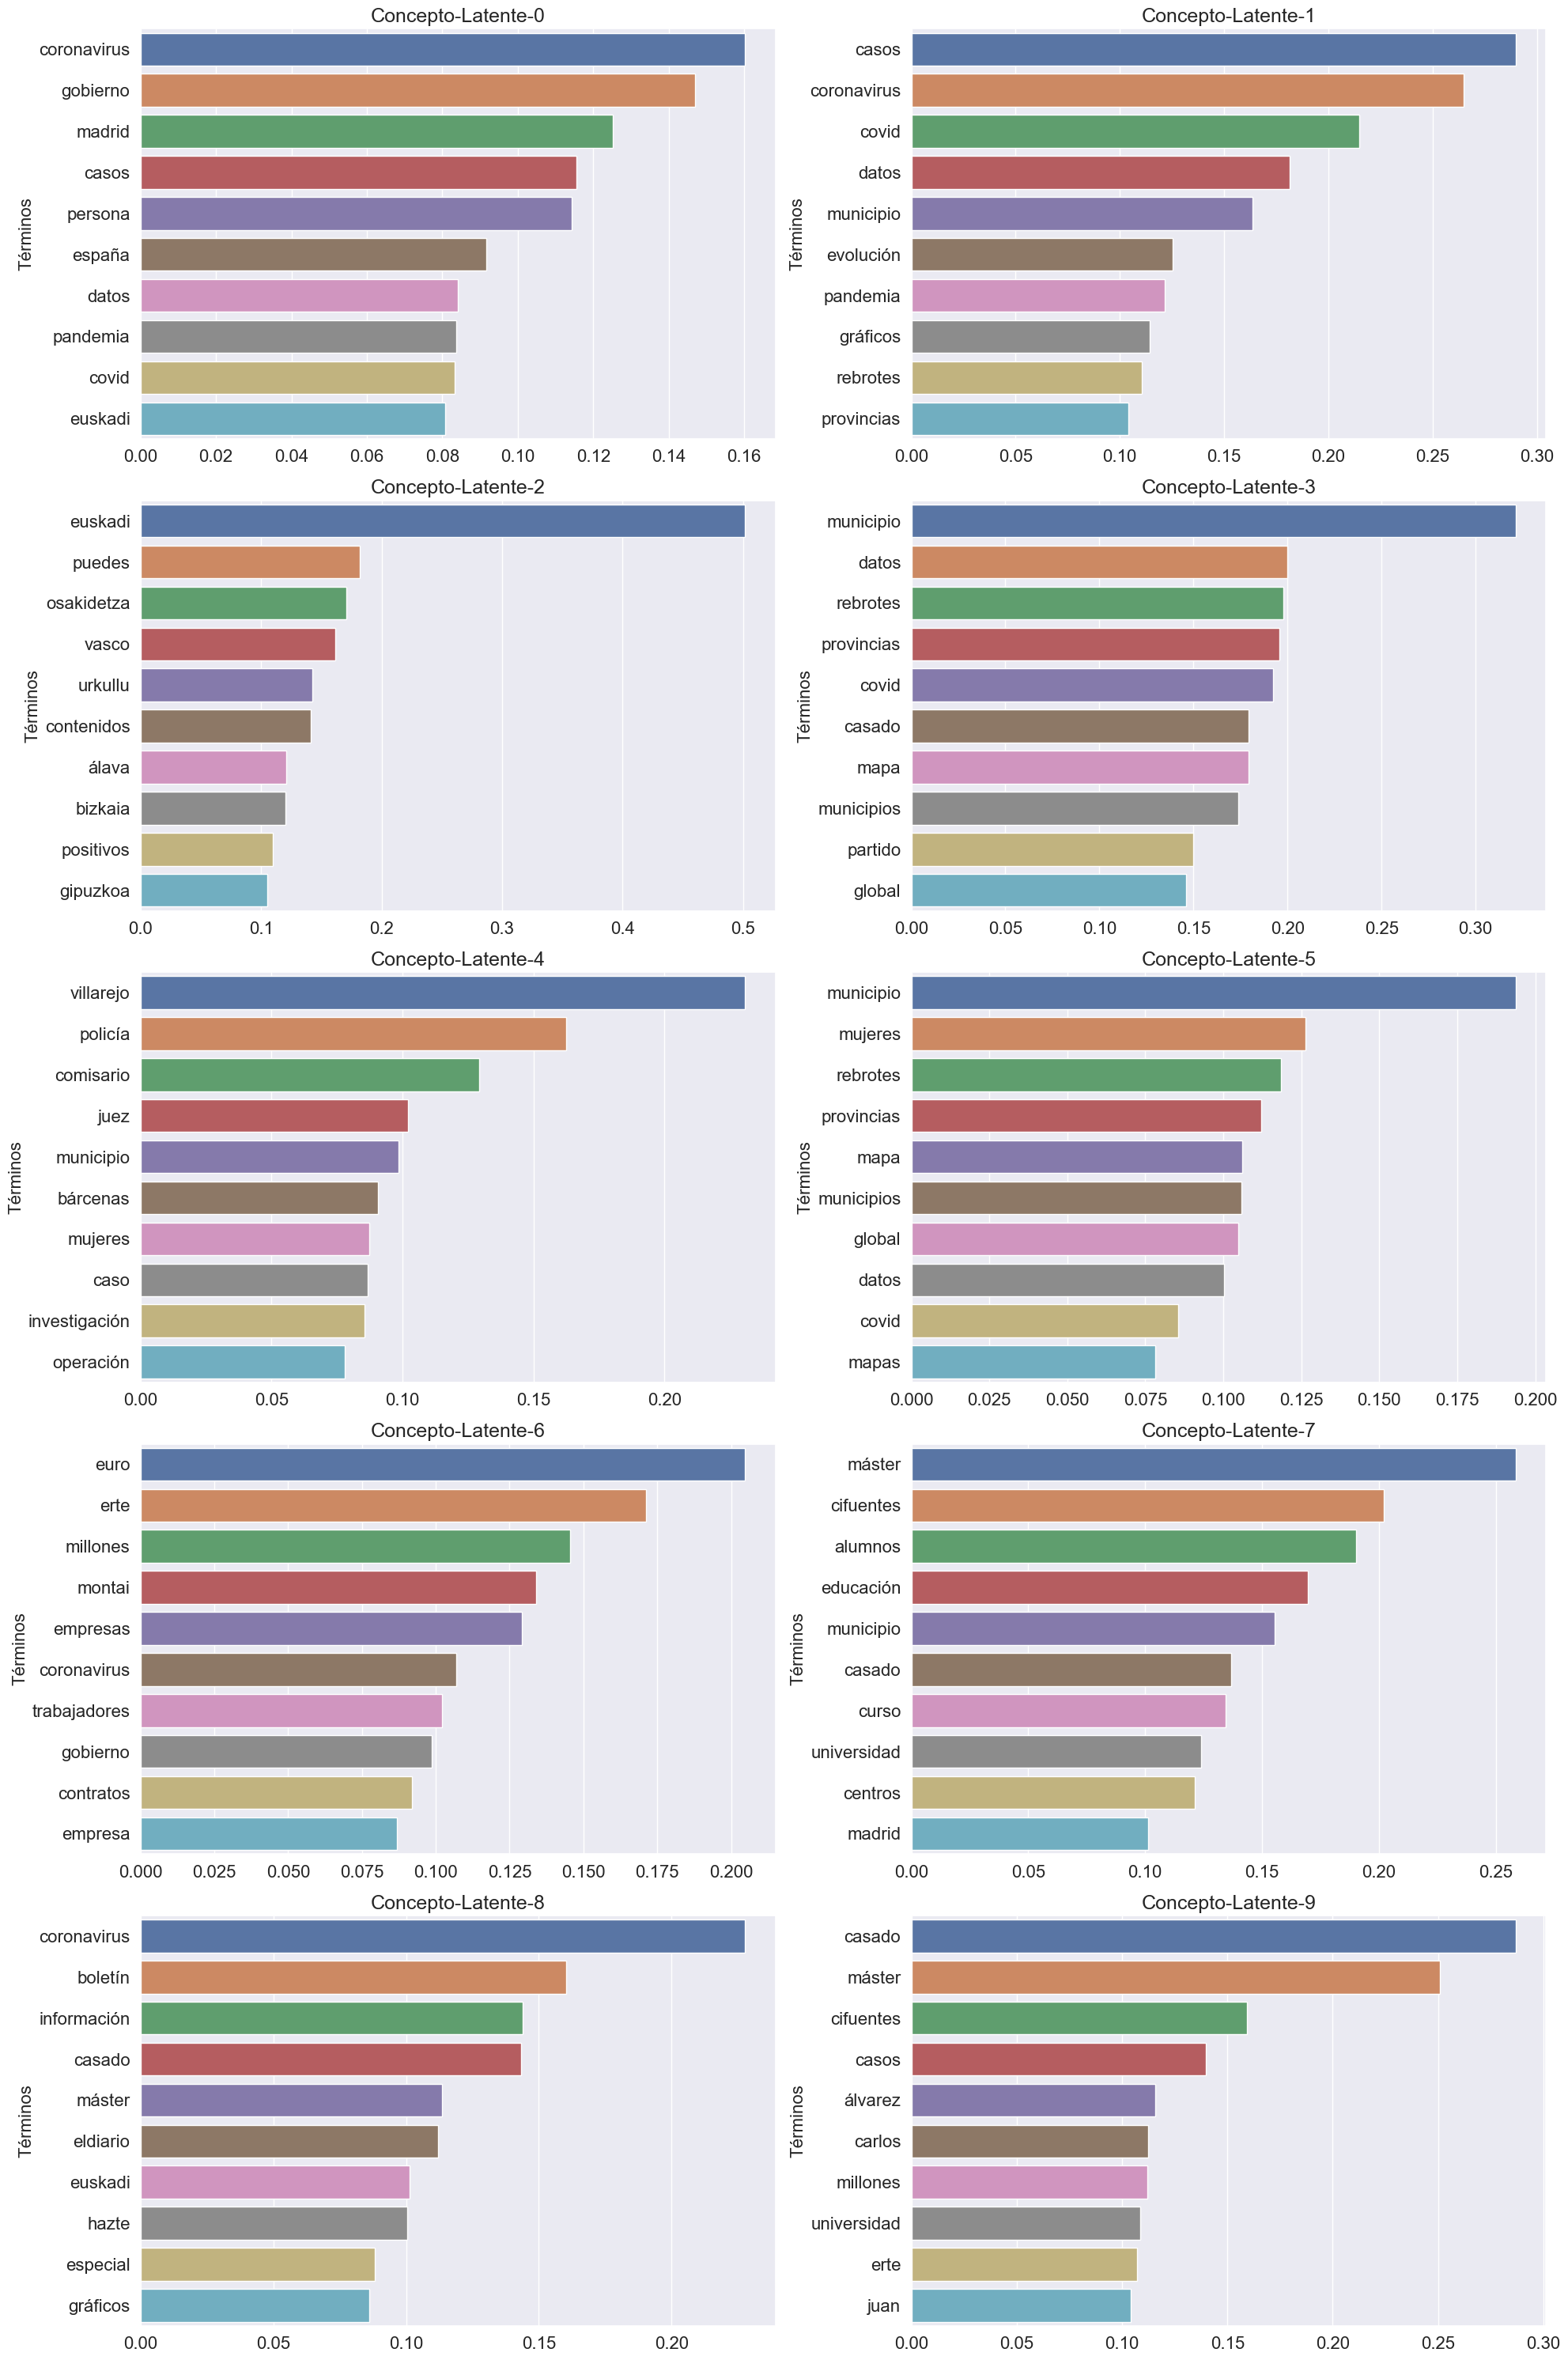

In [63]:
top_w = 10 

fig, axes = plt.subplots(5,2, figsize=(20, 30))
axes = axes.flatten()

for i in range(0,len(term_topic_matrix.columns)):
    data = term_topic_matrix[f'Concepto_Latente_{i}']
    data = data.sort_values(ascending=False)
    top_w_matrix = data[:top_w]
    
    # Creamos el histograma en el subplot correspondiente
    sns.barplot(ax=axes[i], x=top_w_matrix.values, y=top_w_matrix.index)
    axes[i].set_title(f'Concepto-Latente-{i}', fontsize=18)
    axes[i].set_ylabel('Términos', fontsize=16)
    axes[i].tick_params(labelsize=16)

plt.tight_layout()
plt.show()

#### ¿Cómo describirías cada uno de dichos conceptos latentes?

Referente a los conceptos latentes, me parece un proceso interesante para realizar la separación y análisis de un tema, como podemos ver el cada unos de los histográmas tenemos un vistazo general de cada palabra que tiene un peso significativo en cada uno de nuestros documentos.

#### ¿Se identifican claramente las temáticas de cada uno de ellos?

En general se logra identificar de buena forma la temática en cada concepto latente, en el caso 2 hay algunas palabrás no identificadas, pero podríamos tomarlas para poder hacer un filtrado más profundo y obtener palabras que si permitan identificar de buena forma cada uno de los temas.

## Parte 2: Asignación de Dirichlet Latente (LDA)

#**Pregunta - 7:**

Utiliza la librería Gensim para implementar ahora la técnica de LDA. Revisa la documentación correspondiente y aplica de preferencia el modelo paralelizable:
https://radimrehurek.com/gensim/models/ldamodel.html

https://radimrehurek.com/gensim/models/ldamulticore.html

In [50]:
# Crear el diccionario y el corpus
id2word = corpora.Dictionary(Xclean)
texts = Xclean
corpus = [id2word.doc2bow(text) for text in texts]

#**Pregunta - 8:**

Con base a esta técnica ¿qué cantidad de tópicos consideras que es la más adecuada? Compara tus resultados con el método LSI. ¿Qué encuentras de coincidencias y diferencias? ¿Cuál consideras puede ser el mejor resultado, es decir, cuál consideras puede ser la mejor cantidad de tópicos a considerar?

In [56]:
# Crear el modelo LDA
num_topics = 10
lda_model = gensim.models.LdaModel(corpus=corpus,
                                   id2word=id2word,
                                   num_topics=num_topics,
                                   random_state=100,
                                   update_every=1,
                                   chunksize=10,
                                   passes=10,
                                   alpha='auto',
                                   per_word_topics=True)

In [57]:
# Mostrar los tópicos
for idx, topic in lda_model.print_topics(-1):
    print(f'Tópico: {idx}\nPalabras: {topic}\n')

Tópico: 0
Palabras: 0.017*"casos" + 0.017*"coronavirus" + 0.015*"cada" + 0.012*"días" + 0.012*"datos" + 0.012*"eldiario" + 0.012*"españa" + 0.011*"información" + 0.009*"crisis" + 0.009*"mundo"

Tópico: 1
Palabras: 0.017*"caso" + 0.010*"policía" + 0.010*"investigación" + 0.009*"juan" + 0.009*"tribunal" + 0.008*"según" + 0.008*"carlos" + 0.007*"fiscalía" + 0.007*"justicia" + 0.007*"juez"

Tópico: 2
Palabras: 0.018*"persona" + 0.014*"covid" + 0.014*"madrid" + 0.012*"comunidad" + 0.012*"medidas" + 0.012*"salud" + 0.010*"sanidad" + 0.010*"centros" + 0.009*"pandemia" + 0.009*"zona"

Tópico: 3
Palabras: 0.024*"gobierno" + 0.011*"podemos" + 0.009*"partido" + 0.009*"política" + 0.009*"madrid" + 0.007*"presidente" + 0.007*"sánchez" + 0.006*"ciudadanos" + 0.006*"casado" + 0.005*"psoe"

Tópico: 4
Palabras: 0.013*"millones" + 0.009*"euro" + 0.007*"empresas" + 0.007*"trabajo" + 0.006*"social" + 0.005*"empresa" + 0.005*"según" + 0.004*"mayor" + 0.004*"trabajadores" + 0.004*"economía"

Tópico: 5
Palab

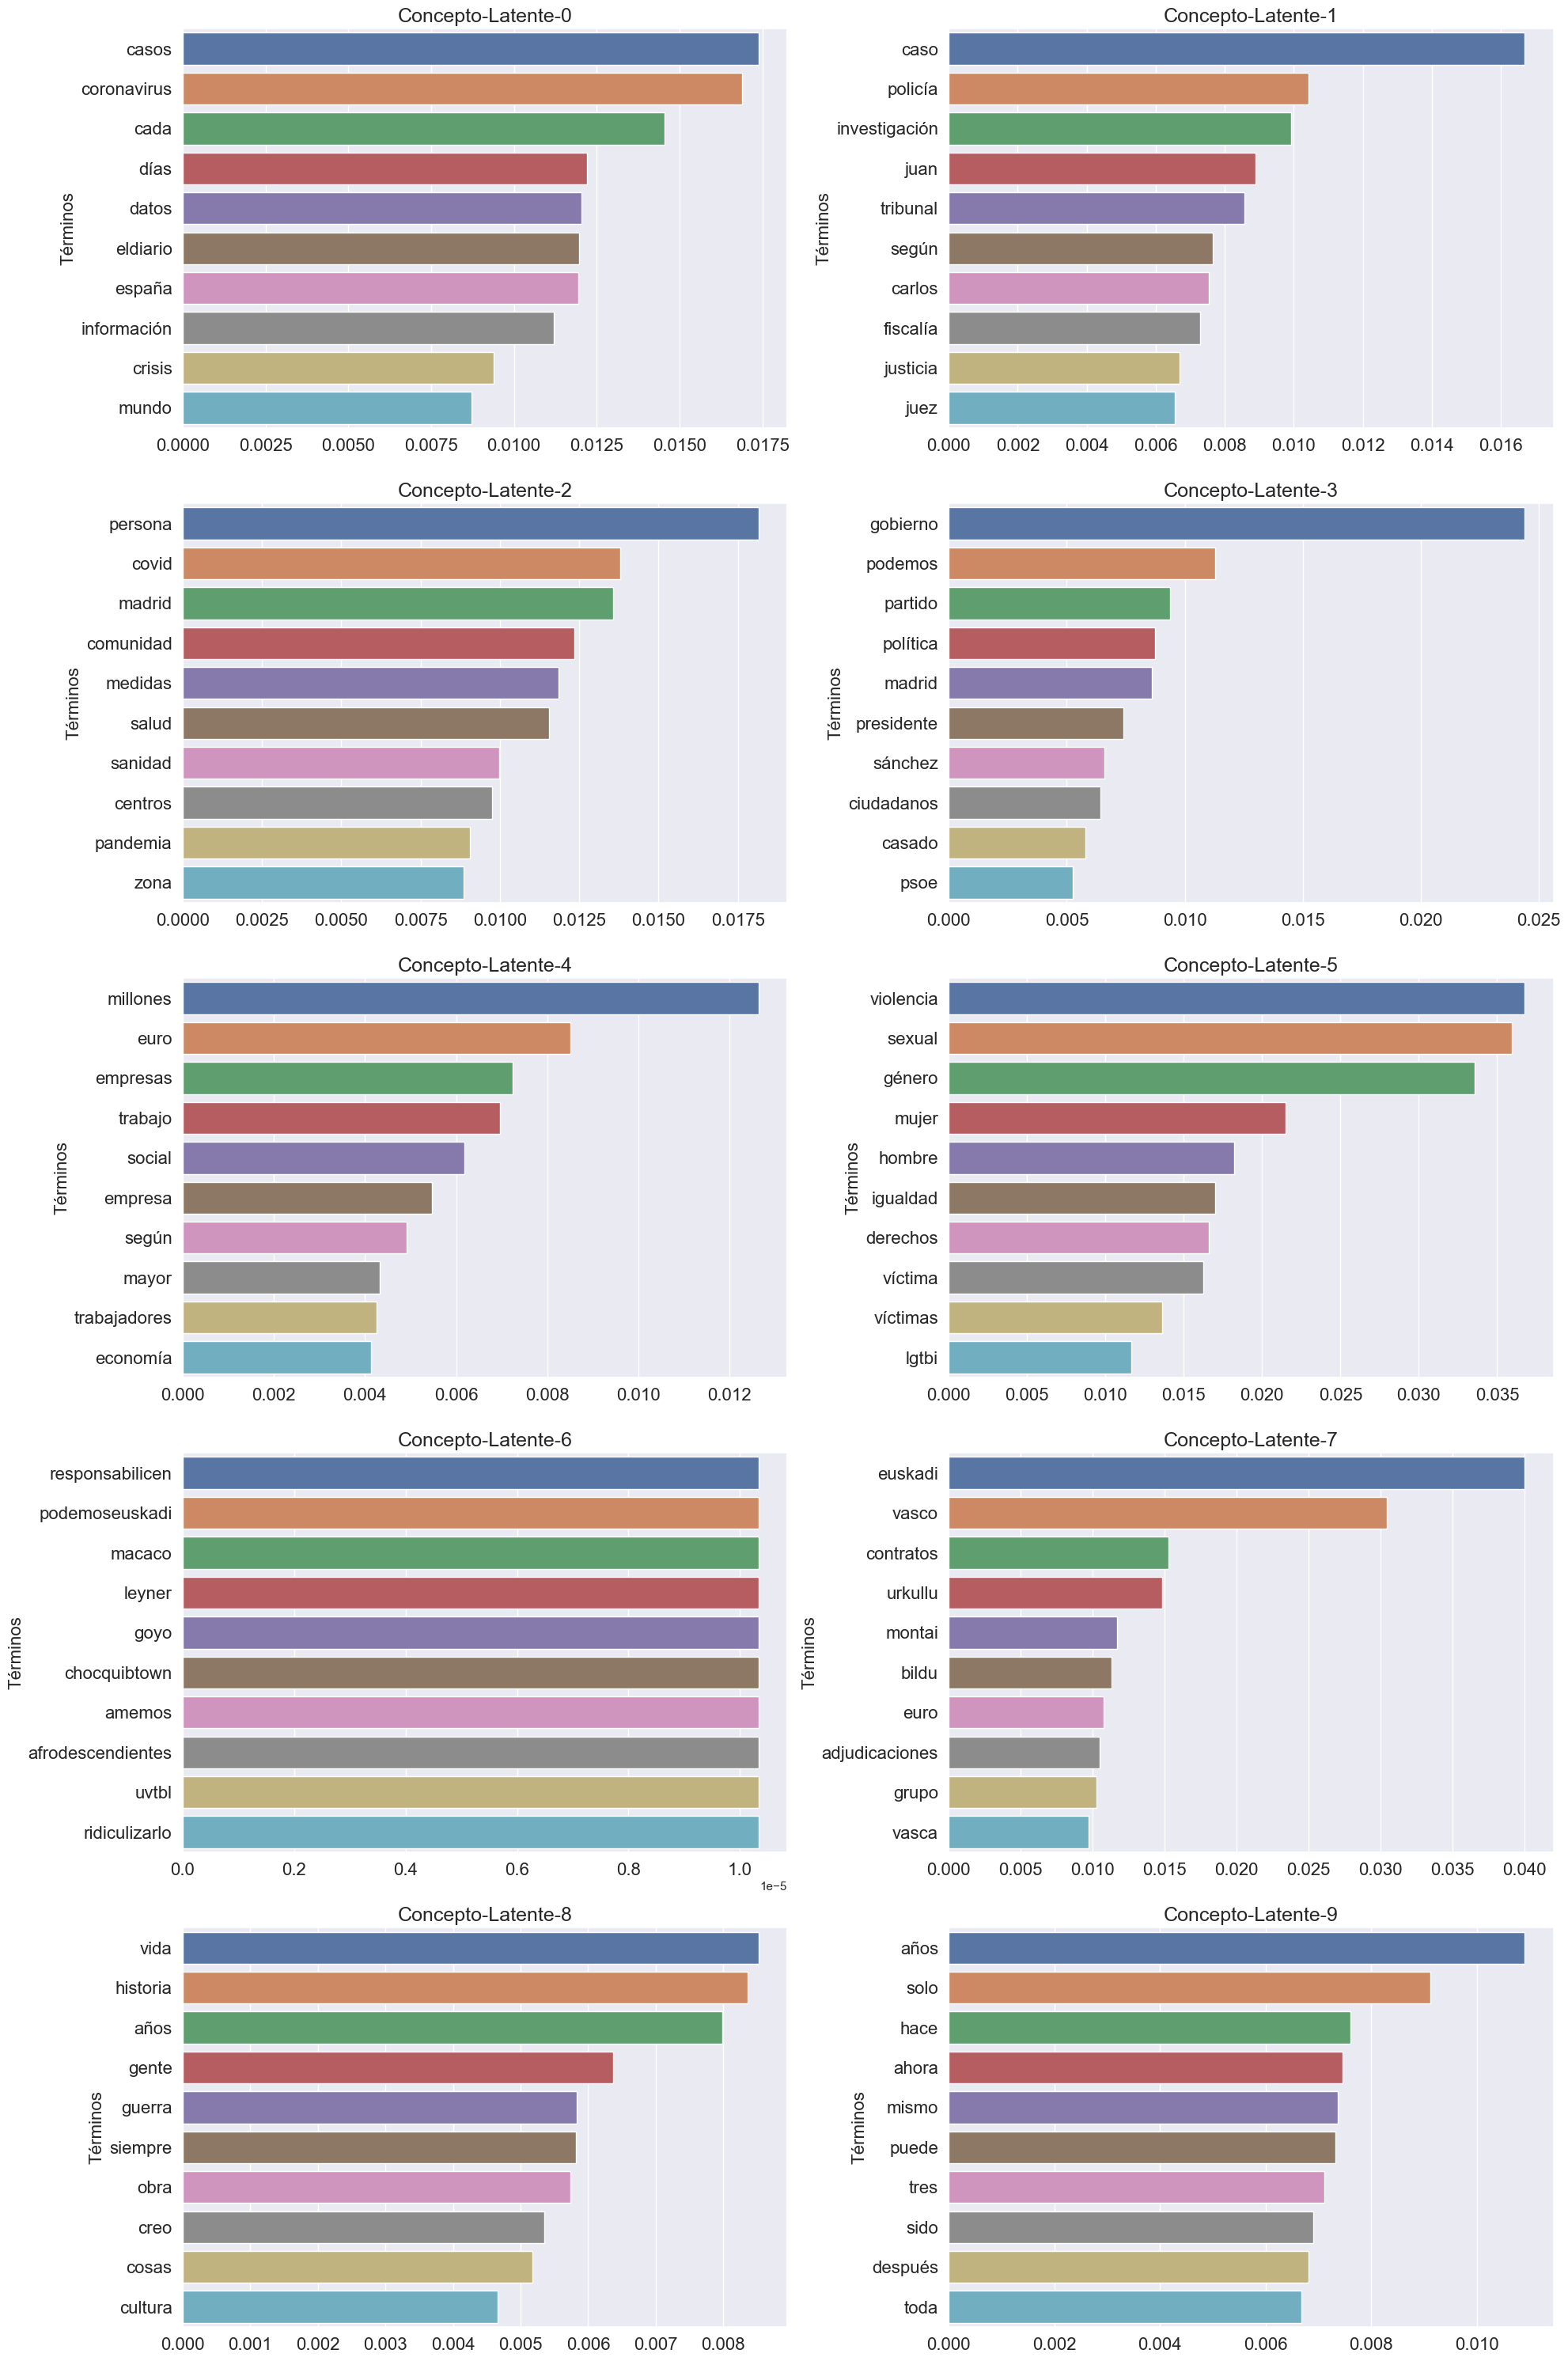

In [64]:
warnings.filterwarnings("ignore")
fig, axes = plt.subplots(5,2, figsize=(20, 30))
axes = axes.flatten()

for i in range(num_topics):
    topic_terms = lda_model.show_topic(i, topn=10)
    terms = [term for term, _ in topic_terms]
    weights = [weight for _, weight in topic_terms]
    
    # Creamos el histograma en el subplot correspondiente
    sns.barplot(ax=axes[i], x=weights, y=terms)
    axes[i].set_title(f'Concepto-Latente-{i}', fontsize=18)
    axes[i].set_ylabel('Términos', fontsize=16)
    axes[i].tick_params(labelsize=16)

plt.tight_layout()
plt.show()

#### ¿Qué cantidad de tópicos consideras que es la más adecuada?

Dada la cantidad de información presentada por el corpus, me parece buena la cantidad de 10 topicos, aunque podría ser más elevada para poder obtener un buen análisis y representación de cada uno de los topicos. En general puedo visualizar que algunos se concentran en el tema de la pandemia así como algunos otros témas sociales.

#### ¿Qué encuentras de coincidencias y diferencias?

En general hay algunos temas en común, tal es el caso de la pandemia, sin embargo puedo ver que la variedad es mayor a través del análisis con el proceso LDA, así mismo, al momento de realizar el procesamiento es considerablemente más laborioso y tardado que el procesamiento con Factorización SVD.

#### ¿Cuál consideras puede ser el mejor resultado, es decir, cuál consideras puede ser la mejor cantidad de tópicos a considerar?

Para obtener mejores resultados me parece el método LDA se puede obtener mejores resultados aunque el poder de cómputo suele ser mayor.

#**Pregunta - 9:**

#### Incluye tus comentarios finales de la actividad.



En esta práctica, exploramos dos técnicas fundamentales para el análisis de tópicos en conjuntos de datos de texto: Latent Dirichlet Allocation (LDA) y Singular Value Decomposition (SVD). Ambas técnicas son ampliamente utilizadas en el procesamiento de lenguaje natural y la minería de textos para descubrir la estructura subyacente en grandes volúmenes de documentos.

En nuestra práctica, aplicamos LDA a nuestro conjunto de datos y observamos cómo los documentos se distribuyen en diferentes tópicos. Esto nos permitió obtener una comprensión más profunda de los temas presentes en el corpus y cómo están relacionados entre sí.

En nuestra práctica, aplicamos SVD para reducir la dimensionalidad de la matriz TF-IDF generada a partir de nuestro conjunto de datos. Esto nos permitió visualizar la distribución de documentos en un espacio de menor dimensión y examinar las relaciones entre los documentos y los tópicos identificados por LDA.

En resumen, mediante el uso de LDA y SVD, pudimos explorar la estructura latente en nuestros datos de texto y descubrir los tópicos principales presentes en el corpus. Estas técnicas son útiles para una variedad de aplicaciones, como la agrupación de documentos, la recomendación de contenido y el análisis de sentimientos, y pueden proporcionar información valiosa para la toma de decisiones en una amplia gama de campos.